In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
test = pd.read_csv("Test.csv")
train = pd.read_csv("Train.csv")

In [3]:
test_original = test.copy()
train_original = train.copy()

In [4]:
train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [5]:
train.shape, test.shape

((18288, 3), (5112, 2))

In [6]:
test.head() # We will make predictions on the passengers count

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5112 entries, 0 to 5111
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        5112 non-null   int64 
 1   Datetime  5112 non-null   object
dtypes: int64(1), object(1)
memory usage: 80.0+ KB


It is necessary to change datetime from object to datetime format

In [8]:
train['Datetime'] = pd.to_datetime(train['Datetime'], infer_datetime_format = True)
test['Datetime'] = pd.to_datetime(test['Datetime'], infer_datetime_format = True)


Extracting year, month, day and hour

In [9]:
for i in (train, test):
    i['year'] = i.Datetime.dt.year
    i['month'] = i.Datetime.dt.month
    i['day'] = i.Datetime.dt.day
    i['hour'] = i.Datetime.dt.hour

In [10]:
train.head()

,ID,Datetime,Count,year,month,day,hour
0,0,2012-08-25 00:00:00,8,2012,8,25,0
1,1,2012-08-25 01:00:00,2,2012,8,25,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2
3,3,2012-08-25 03:00:00,2,2012,8,25,3
4,4,2012-08-25 04:00:00,2,2012,8,25,4


In [11]:
train['Day of Week'] = train['Datetime'].dt.dayofweek # Takes from Datetime column the day of the week in a new one

Note: Saturday is day 5 and sunday is day 6

In [12]:
train.sample(5)

,ID,Datetime,Count,year,month,day,hour,Day of Week
8311,8311,2013-08-06 07:00:00,78,2013,8,6,7,1
9454,9454,2013-09-22 22:00:00,94,2013,9,22,22,6
5837,5837,2013-04-25 05:00:00,14,2013,4,25,5,3
1491,1491,2012-10-26 03:00:00,8,2012,10,26,3,4
407,407,2012-09-10 23:00:00,4,2012,9,10,23,0


Now we will generate a new column to know if that day is a weekday or not

In [13]:
def applyer(row): # Only for datetime rows!
    if row.dayofweek == 5 or row.dayofweek ==6:
        return 1
    else:
        return 0

In [14]:
train['Weekend'] = train['Datetime'].apply(applyer)
train.sample(5)

,ID,Datetime,Count,year,month,day,hour,Day of Week,Weekend
5351,5351,2013-04-04 23:00:00,96,2013,4,4,23,3,0
12605,12605,2014-02-01 05:00:00,72,2014,2,1,5,5,1
5190,5190,2013-03-29 06:00:00,22,2013,3,29,6,4,0
7648,7648,2013-07-09 16:00:00,122,2013,7,9,16,1,0
5344,5344,2013-04-04 16:00:00,44,2013,4,4,16,3,0


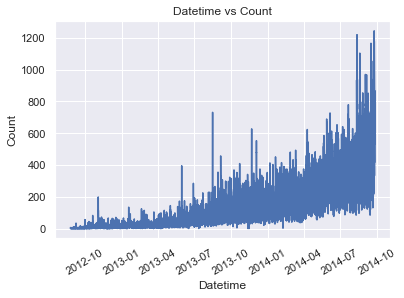

In [16]:
sns.set_theme(style="darkgrid")
# Plot the responses for different events and regions
sns.lineplot(x="Datetime", y="Count", data=train)
plt.xticks(rotation=30)
plt.title('Datetime vs Count')
plt.show()

## EDA

Will traffic increase as years pass by??

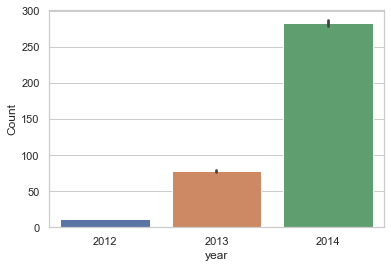

In [18]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="year", y="Count", data=train)

Let's see passenger distribution along 2014

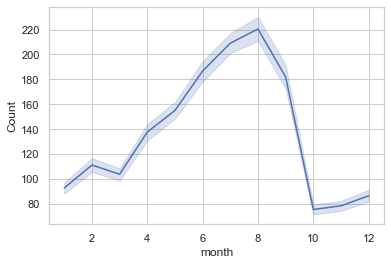

In [22]:
sns.lineplot(x="month", y="Count",
             data=train)
plt.show()

Lets filter only 2013 and 2014 values

In [36]:
years = [2013, 2014]
Data_20134 = train.loc[(train['year'] == 2013) | (train['year'] == 2014)]

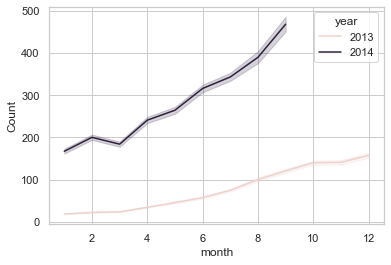

In [38]:
sns.lineplot(x="month", y="Count", hue='year',
             data=Data_20134)
plt.show()